## SCRAPING SITO DEL CENTRO RICERCA CRISP

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.crisp-org.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
CRISP | Centro di ricerca interuniversitario per i servizi di pubblica utilità


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['',
 '/school/seminars-events/formazione-universitaria-e-posti-di-lavoro-proiezioni-spaziali-e-temporali/',
 '/research/healthcare/',
 '/the-mission/',
 '/research/education-training-and-human-capital/',
 '/research',
 '/school/seminars-events/',
 '#',
 'https://www.crisp-org.it/novembre-2020-noncognitiveskills/',
 '/school/seminars-events/big-data-artificial-intelligence/',
 'https://www.linkedin.com/company/crisp-università-di-milano-bicocca?trk=biz-companies-cym',
 '/press',
 '/school/masters-courses/',
 'https://twitter.com/CRISP_Ricerca',
 '/school/seminars-events/seminario-5luglio/',
 'https://www.facebook.com/pages/Master-in-Business-Intelligence-Università-Bicocca/184818634914010',
 'https://www.crisp-org.it/school/seminars-events/presentazione-9edizione-master-bi-bda-2/',
 'https://www.crisp-org.it/public/uploads/2014/12/articoli-rassegna-13-11.zip',
 'https://eduscopio.it/il-progetto',
 '/school/',
 '/school/workshops/',
 '/school/seminars-events/le-professioni-ai-tempi-dell

In [8]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
matchers = ['/research/']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['/research/healthcare/',
 '/research/labour-market/',
 '/research/education-training-and-human-capital/',
 '/research/innovation-and-services-management/',
 '/research/']

In [9]:
string = 'https://www.crisp-org.it' 
lista_url2 = [string+x for x in lista_url2]
lista_url2 

['https://www.crisp-org.it/research/healthcare/',
 'https://www.crisp-org.it/research/labour-market/',
 'https://www.crisp-org.it/research/education-training-and-human-capital/',
 'https://www.crisp-org.it/research/innovation-and-services-management/',
 'https://www.crisp-org.it/research/']

In [10]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"row"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Healthcare  | CRISP',
 'Labour Market  | CRISP',
 'Education, training and human capital  | CRISP',
 'Innovation and services management | CRISP',
 'Archivi research - CRISP']

In [11]:
print(texts[0])






Home page
Area Riservata
CRISP

The Centre
Mission
People
Institutional


Research

Labour Market
Healthcare
Innovation and services management
Education, training and human capital


School

Seminars & Events
Master Courses
Summer School
Workshops


Press
Contact us





### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

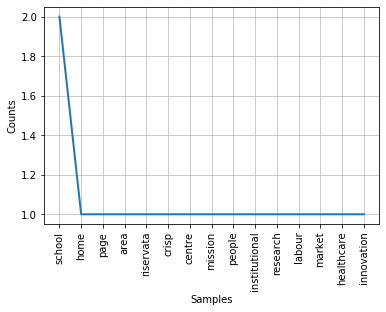

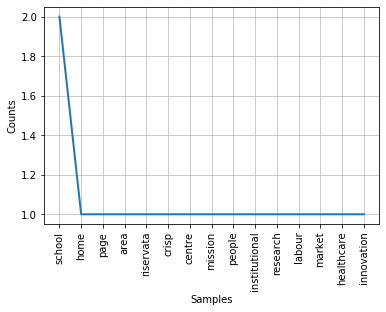

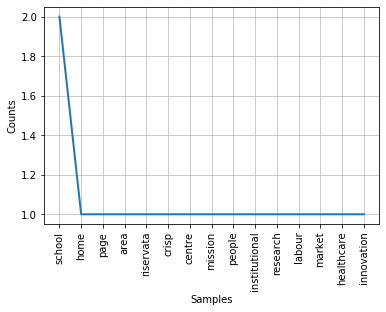

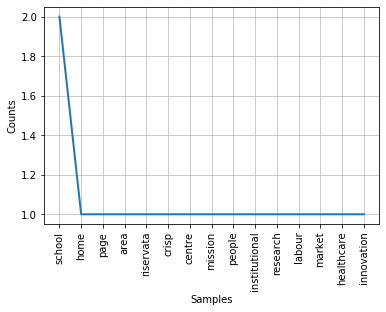

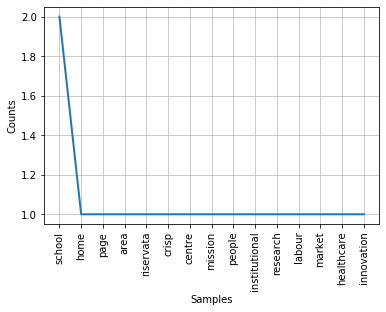

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

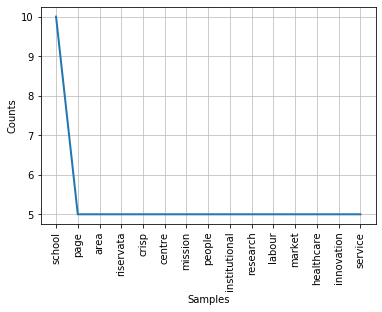

In [15]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

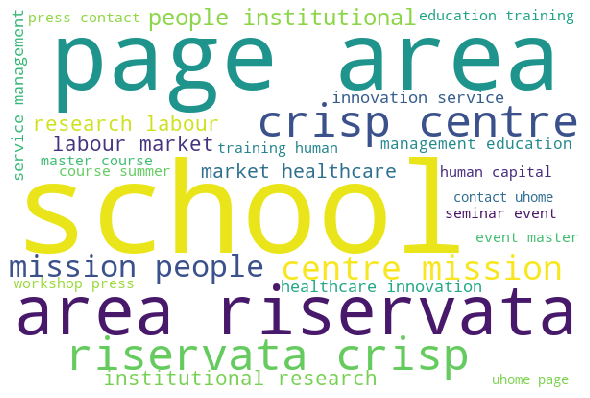

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [17]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [18]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'home': 9.5699},
 {'page': 7.248},
 {'area': 7.248},
 {'riservata': 7.248},
 {'crisp': 7.248},
 {'centre': 7.248},
 {'mission': 7.248},
 {'people': 7.248},
 {'institutional': 7.248},
 {'research': 7.248},
 {'labour': 7.248},
 {'market': 7.248},
 {'healthcare': 7.248},
 {'innovation': 7.248},
 {'service': 7.248},
 {'management': 7.248},
 {'education': 7.248},
 {'training': 7.248},
 {'human': 7.248},
 {'capital': 7.248},
 {'school': 6.248},
 {'seminar': 7.248},
 {'event': 7.248},
 {'master': 7.248},
 {'course': 7.248},
 {'summer': 7.248},
 {'workshop': 7.248},
 {'press': 7.248},
 {'contact': 7.248},
 {'uhome': 7.5699},
 {'u': 9.5699}]

In [19]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'school': 6.248},
 {'page': 7.248},
 {'area': 7.248},
 {'riservata': 7.248},
 {'crisp': 7.248},
 {'centre': 7.248},
 {'mission': 7.248},
 {'people': 7.248},
 {'institutional': 7.248},
 {'research': 7.248},
 {'labour': 7.248},
 {'market': 7.248},
 {'healthcare': 7.248},
 {'innovation': 7.248},
 {'service': 7.248},
 {'management': 7.248},
 {'education': 7.248},
 {'training': 7.248},
 {'human': 7.248},
 {'capital': 7.248},
 {'seminar': 7.248},
 {'event': 7.248},
 {'master': 7.248},
 {'course': 7.248},
 {'summer': 7.248},
 {'workshop': 7.248},
 {'press': 7.248},
 {'contact': 7.248},
 {'page': 7.248},
 {'area': 7.248},
 {'riservata': 7.248},
 {'crisp': 7.248},
 {'centre': 7.248},
 {'mission': 7.248},
 {'people': 7.248},
 {'institutional': 7.248},
 {'research': 7.248},
 {'labour': 7.248},
 {'market': 7.248},
 {'healthcare': 7.248},
 {'innovation': 7.248},
 {'service': 7.248},
 {'management': 7.248},
 {'education': 7.248},
 {'training': 7.248},
 {'human': 7.248},
 {'capital': 7.248},
 {'sem